# 1 rename

In [9]:
import os
import pandas as pd
df = pd.read_csv('XFold_Ranking_for_Lsb001.csv')
id_new = ['Lsb001_%02d'%i for i in range(len(df))]
df['id_new']=id_new
df
# pdb_name=[os.path.basename(i) for i in df['pdb_filepath']]
# # print(pdb_name)
# d_name=dict(zip(pdb_name,id_new))
# d_name
# for i in d_name.keys():
    # print(d_name[i])
    # os.system('cp lsb_001/'+i+' 01_rename_pdbs/'+d_name[i]+'.pdb')

,id,model,recycle,plddt,ptm,iptm,RC,pdb_filepath,id_new
0,Lsb001,alphafold2_multimer_v3_model_3_seed_057,20,92.0,0.898,0.865,0.8716,vhh_al_001/af_m/54_v3/Lsb001_unrelaxed_rank_00...,Lsb001_00
1,Lsb001,alphafold2_multimer_v2_model_1_seed_044,19,92.9,0.887,0.860,0.8654,vhh_al_001/af_m/42_v2_t/Lsb001_unrelaxed_rank_...,Lsb001_01
2,Lsb001,alphafold2_multimer_v3_model_3_seed_033,0,86.6,0.832,0.735,0.7544,vhh_al_001/af_m/30_v3/Lsb001_unrelaxed_rank_00...,Lsb001_02
3,Lsb001,alphafold2_multimer_v1_model_4_seed_035,1,90.2,0.803,0.696,0.7174,vhh_al_001/af_m/30_v1_m2/Lsb001_unrelaxed_rank...,Lsb001_03
4,Lsb001,alphafold2_multimer_v1_model_3_seed_029,0,81.9,0.776,0.667,0.6888,vhh_al_001/af_m/24_v1_m2/Lsb001_unrelaxed_rank...,Lsb001_04
...,...,...,...,...,...,...,...,...,...
80,Lsb001,alphafold2_multimer_v1_model_1_seed_018,1,86.6,0.533,0.162,0.2362,vhh_al_001/af_m/18_v1_dt/Lsb001_unrelaxed_rank...,Lsb001_80
81,Lsb001,alphafold2_multimer_v2_model_1_seed_024,2,83.0,0.528,0.160,0.2336,vhh_al_001/af_m/24_v2_dt/Lsb001_unrelaxed_rank...,Lsb001_81
82,Lsb001,alphafold2_multimer_v3_model_2_seed_053,11,81.3,0.527,0.155,0.2294,vhh_al_001/af_m/48_v3_m2/Lsb001_unrelaxed_rank...,Lsb001_82
83,Lsb001,alphafold2_multimer_v2_model_2_seed_020,0,82.6,0.517,0.125,0.2034,vhh_al_001/af_m/18_v2_t/Lsb001_unrelaxed_rank_...,Lsb001_83


# 2 relax

In [ ]:
from joblib import Parallel, delayed
import os
os.system('cd 02_relax')
pdbs = sorted([i.split('.')[0] for i in os.listdir('../01_rename_pdbs') if 'pdb' in i])
print(pdbs)
def relax(ab):
    cmd='relax.static.linuxgccrelease -s ../01_rename_pdbs/'+ab+'.pdb'
    os.system(cmd)

Parallel(n_jobs=90)(delayed(relax)(i) for i in pdbs)
os.system('cd ..')

# 3 I_sc

In [ ]:
from joblib import Parallel, delayed
import os
os.system('mkdir 03_I_sc\ncd 03_I_sc')
pdbs = sorted([i.split('.')[0] for i in os.listdir('../01_rename_pdbs') if 'pdb' in i])
print(pdbs)
def run(ab):
    cmd='rm -r '+ab+'\n mkdir '+ab+'\n cd '+ab+'\n cp ../pack_input_options.txt .\n'
    cmd+='InterfaceAnalyzer.static.linuxgccrelease -s ../../02_relax/'+ab+'_0001.pdb @pack_input_options.txt'
    os.system(cmd)

Parallel(n_jobs=90)(delayed(run)(i) for i in pdbs)
os.system('cat Lsb001_00/pack_input_score.sc |head -n2|tail -n1 >sc.csv')
os.system('for i in `ls |grep Lsb|sort`;do echo $i;cat $i/pack_input_score.sc|head -n3|tail -n1 >>sc.csv;done')
os.system('cd ..')

# 4 merge I_sc and xfold score

In [10]:
df_Isc=pd.read_csv('03_Isc/sc.csv',sep='\s+')
df_Isc['id_new']=[i.split('_0001_')[0] for i in df_Isc['description']]
df_merge=pd.merge(df,df_Isc,on='id_new')
df_merge

,id,model,recycle,plddt,ptm,iptm,RC,pdb_filepath,id_new,SCORE:,...,pro_close,rama_prepro,ref,sc_value,side1_normalized,side1_score,side2_normalized,side2_score,yhh_planarity,description
0,Lsb001,alphafold2_multimer_v3_model_3_seed_057,20,92.0,0.898,0.865,0.8716,vhh_al_001/af_m/54_v3/Lsb001_unrelaxed_rank_00...,Lsb001_00,SCORE:,...,1.596,-10.260,78.95,0.602,-3.332,-69.980,-2.721,-62.592,0.209,Lsb001_00_0001_0001
1,Lsb001,alphafold2_multimer_v2_model_1_seed_044,19,92.9,0.887,0.860,0.8654,vhh_al_001/af_m/42_v2_t/Lsb001_unrelaxed_rank_...,Lsb001_01,SCORE:,...,1.168,-5.765,78.95,0.652,-2.924,-70.184,-3.074,-76.862,0.173,Lsb001_01_0001_0001
2,Lsb001,alphafold2_multimer_v3_model_3_seed_033,0,86.6,0.832,0.735,0.7544,vhh_al_001/af_m/30_v3/Lsb001_unrelaxed_rank_00...,Lsb001_02,SCORE:,...,1.122,-0.880,78.95,0.619,-2.274,-50.029,-3.012,-78.306,0.598,Lsb001_02_0001_0001
3,Lsb001,alphafold2_multimer_v1_model_4_seed_035,1,90.2,0.803,0.696,0.7174,vhh_al_001/af_m/30_v1_m2/Lsb001_unrelaxed_rank...,Lsb001_03,SCORE:,...,3.684,-0.837,78.95,0.580,-2.623,-78.704,-2.754,-85.366,0.131,Lsb001_03_0001_0001
4,Lsb001,alphafold2_multimer_v1_model_3_seed_029,0,81.9,0.776,0.667,0.6888,vhh_al_001/af_m/24_v1_m2/Lsb001_unrelaxed_rank...,Lsb001_04,SCORE:,...,2.186,4.500,78.95,0.600,-1.962,-37.274,-2.227,-57.903,0.190,Lsb001_04_0001_0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Lsb001,alphafold2_multimer_v1_model_1_seed_018,1,86.6,0.533,0.162,0.2362,vhh_al_001/af_m/18_v1_dt/Lsb001_unrelaxed_rank...,Lsb001_80,SCORE:,...,2.395,-3.909,78.95,0.602,-1.499,-17.991,-0.785,-8.638,0.407,Lsb001_80_0001_0001
81,Lsb001,alphafold2_multimer_v2_model_1_seed_024,2,83.0,0.528,0.160,0.2336,vhh_al_001/af_m/24_v2_dt/Lsb001_unrelaxed_rank...,Lsb001_81,SCORE:,...,1.672,-9.012,78.95,0.693,-1.803,-18.031,-2.127,-21.265,0.618,Lsb001_81_0001_0001
82,Lsb001,alphafold2_multimer_v3_model_2_seed_053,11,81.3,0.527,0.155,0.2294,vhh_al_001/af_m/48_v3_m2/Lsb001_unrelaxed_rank...,Lsb001_82,SCORE:,...,1.173,-9.959,78.95,0.614,-2.667,-45.332,-2.489,-39.817,0.147,Lsb001_82_0001_0001
83,Lsb001,alphafold2_multimer_v2_model_2_seed_020,0,82.6,0.517,0.125,0.2034,vhh_al_001/af_m/18_v2_t/Lsb001_unrelaxed_rank_...,Lsb001_83,SCORE:,...,1.117,-7.846,78.95,0.596,-3.360,-60.471,-3.065,-49.040,0.404,Lsb001_83_0001_0001


In [11]:
df_merge.to_csv('lsb001_Isc.csv')

In [53]:
# plt.Figure(figsize=(40,40))
df_scatter = df_merge.loc[:,['plddt','ptm','iptm','RC','total_score','dG_separated','dG_separated/dSASAx100']]
pd.plotting.scatter_matrix(df_scatter, alpha=0.7,figsize=(13,13))


# 5 clustering

In [ ]:
## reference mdtraj clustering
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy
# from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from scipy.spatial.distance import squareform

l_traj=[md.load('01_rename_pdbs/'+i+'.pdb') for i in id_new]
traj=md.join(l_traj)
traj

distances = np.empty((traj.n_frames, traj.n_frames))
for i in range(traj.n_frames):
    distances[i] = md.rmsd(traj, traj, i)
print('Max pairwise rmsd: %f nm' % np.max(distances))


[[ 24.          25.           0.20663589   2.        ]
 [ 10.          37.           0.21666208   2.        ]
 [  1.          17.           0.21846552   2.        ]
 [ 40.          41.           0.21876687   2.        ]
 [  2.          22.           0.22000402   2.        ]
 [ 31.          60.           0.22190857   2.        ]
 [ 32.          52.           0.22243991   2.        ]
 [ 29.          35.           0.22301608   2.        ]
 [ 38.          65.           0.22457151   2.        ]
 [ 19.          54.           0.22505794   2.        ]
 [ 43.          48.           0.22704779   2.        ]
 [  0.           9.           0.22704895   2.        ]
 [ 11.          94.           0.22721975   3.        ]
 [ 47.          61.           0.22845124   2.        ]
 [ 36.          58.           0.22922274   2.        ]
 [  7.          12.           0.23095664   2.        ]
 [ 59.          66.           0.2324       2.        ]
 [ 71.          95.           0.23267289   3.        ]
 [ 44.    

(array([  5,  15,  25,  35,  45,  55,  65,  75,  85,  95, 105, 115, 125,
        135, 145, 155, 165, 175, 185, 195, 205, 215, 225, 235, 245, 255,
        265, 275, 285, 295, 305, 315, 325, 335, 345, 355, 365, 375, 385,
        395, 405, 415, 425, 435, 445, 455, 465, 475, 485, 495, 505, 515,
        525, 535, 545, 555, 565, 575, 585, 595, 605, 615, 625, 635, 645,
        655, 665, 675, 685, 695, 705, 715, 725, 735, 745, 755, 765, 775,
        785, 795, 805, 815, 825, 835, 845]),
 [Text(5, 0, '72'),
  Text(15, 0, '74'),
  Text(25, 0, '16'),
  Text(35, 0, '1'),
  Text(45, 0, '17'),
  Text(55, 0, '18'),
  Text(65, 0, '34'),
  Text(75, 0, '33'),
  Text(85, 0, '42'),
  Text(95, 0, '44'),
  Text(105, 0, '67'),
  Text(115, 0, '28'),
  Text(125, 0, '71'),
  Text(135, 0, '43'),
  Text(145, 0, '48'),
  Text(155, 0, '57'),
  Text(165, 0, '70'),
  Text(175, 0, '77'),
  Text(185, 0, '51'),
  Text(195, 0, '79'),
  Text(205, 0, '31'),
  Text(215, 0, '60'),
  Text(225, 0, '5'),
  Text(235, 0, '38'),
  

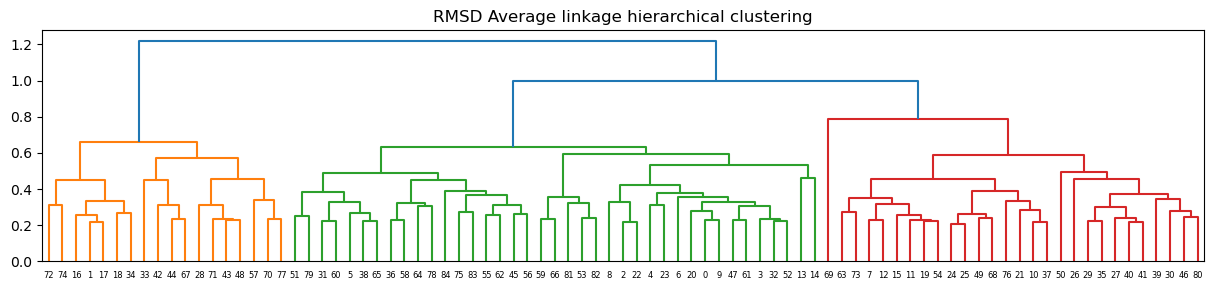

In [28]:

# Clustering only accepts reduced form. Squareform's checks are too stringent
# assert np.all(distances - distances.T < 1e-6)
reduced_distances = squareform(distances, checks=False)


linkage = scipy.cluster.hierarchy.linkage(reduced_distances, method='average')
print(linkage)
plt.figure(figsize=(15,3))
plt.title('RMSD Average linkage hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage,  count_sort='descendent')
plt.xticks(rotation=0)

In [69]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
Z = linkage(reduced_distances, metric='euclidean', method='average')
df_merge['cluster'] = ['cluster_'+str(i) for i in fcluster(Z, 3, criterion='maxclust')]
df_merge

,id,model,recycle,plddt,ptm,iptm,RC,pdb_filepath,id_new,SCORE:,...,rama_prepro,ref,sc_value,side1_normalized,side1_score,side2_normalized,side2_score,yhh_planarity,description,cluster
0,Lsb001,alphafold2_multimer_v3_model_3_seed_057,20,92.0,0.898,0.865,0.8716,vhh_al_001/af_m/54_v3/Lsb001_unrelaxed_rank_00...,Lsb001_00,SCORE:,...,-10.260,78.95,0.602,-3.332,-69.980,-2.721,-62.592,0.209,Lsb001_00_0001_0001,cluster_2
1,Lsb001,alphafold2_multimer_v2_model_1_seed_044,19,92.9,0.887,0.860,0.8654,vhh_al_001/af_m/42_v2_t/Lsb001_unrelaxed_rank_...,Lsb001_01,SCORE:,...,-5.765,78.95,0.652,-2.924,-70.184,-3.074,-76.862,0.173,Lsb001_01_0001_0001,cluster_1
2,Lsb001,alphafold2_multimer_v3_model_3_seed_033,0,86.6,0.832,0.735,0.7544,vhh_al_001/af_m/30_v3/Lsb001_unrelaxed_rank_00...,Lsb001_02,SCORE:,...,-0.880,78.95,0.619,-2.274,-50.029,-3.012,-78.306,0.598,Lsb001_02_0001_0001,cluster_2
3,Lsb001,alphafold2_multimer_v1_model_4_seed_035,1,90.2,0.803,0.696,0.7174,vhh_al_001/af_m/30_v1_m2/Lsb001_unrelaxed_rank...,Lsb001_03,SCORE:,...,-0.837,78.95,0.580,-2.623,-78.704,-2.754,-85.366,0.131,Lsb001_03_0001_0001,cluster_2
4,Lsb001,alphafold2_multimer_v1_model_3_seed_029,0,81.9,0.776,0.667,0.6888,vhh_al_001/af_m/24_v1_m2/Lsb001_unrelaxed_rank...,Lsb001_04,SCORE:,...,4.500,78.95,0.600,-1.962,-37.274,-2.227,-57.903,0.190,Lsb001_04_0001_0001,cluster_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Lsb001,alphafold2_multimer_v1_model_1_seed_018,1,86.6,0.533,0.162,0.2362,vhh_al_001/af_m/18_v1_dt/Lsb001_unrelaxed_rank...,Lsb001_80,SCORE:,...,-3.909,78.95,0.602,-1.499,-17.991,-0.785,-8.638,0.407,Lsb001_80_0001_0001,cluster_3
81,Lsb001,alphafold2_multimer_v2_model_1_seed_024,2,83.0,0.528,0.160,0.2336,vhh_al_001/af_m/24_v2_dt/Lsb001_unrelaxed_rank...,Lsb001_81,SCORE:,...,-9.012,78.95,0.693,-1.803,-18.031,-2.127,-21.265,0.618,Lsb001_81_0001_0001,cluster_2
82,Lsb001,alphafold2_multimer_v3_model_2_seed_053,11,81.3,0.527,0.155,0.2294,vhh_al_001/af_m/48_v3_m2/Lsb001_unrelaxed_rank...,Lsb001_82,SCORE:,...,-9.959,78.95,0.614,-2.667,-45.332,-2.489,-39.817,0.147,Lsb001_82_0001_0001,cluster_2
83,Lsb001,alphafold2_multimer_v2_model_2_seed_020,0,82.6,0.517,0.125,0.2034,vhh_al_001/af_m/18_v2_t/Lsb001_unrelaxed_rank_...,Lsb001_83,SCORE:,...,-7.846,78.95,0.596,-3.360,-60.471,-3.065,-49.040,0.404,Lsb001_83_0001_0001,cluster_2


In [76]:
import plotly.express as px
fig = px.scatter_matrix(df_merge,
    dimensions=['plddt','ptm','total_score','dG_separated','dG_separated/dSASAx100'],
    color='cluster', 
    color_discrete_sequence=["green","orange","red"],
    # symbol="cluster",
     symbol="id_new",
    width=1300,height=1300)
fig.update_traces(diagonal_visible=False)
fig.show()